# Building a Convolutional Neural Network

## Image Classification

In this project, we will build a convolutional neural network to solve a multiclass image classification problem. For this we will use the "CIFAR-10" dataset available on Keras. In includes 60000 32 by 32 images of 10 classes

## Importing the required libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Dataset
Let's download the CIFAR-10 dataset which is included in Keras and assign it to the corresponding variables X_train, y_train, X_test, y_test

Use the datasets.cifar10.load_data() function of keras

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

Now we can print the number of samples in the X_train and X_test datasets to see how the dataset is distributed

In [ ]:
# Print the number of samples
print(f"X_train:{len(X_train)}")
print(f"X_test:{len(X_test)}")

X_train:50000
X_test:10000


Before we move on with the preprocessing of the data, we can print a random sample to see what the data looks like

In [ ]:
# Print a sample from X_test dataset
print(X_test[789])

[[[100 111 134]
  [ 98 110 132]
  [ 98 109 131]
  ...
  [ 69  89 114]
  [ 67  87 113]
  [ 66  86 111]]

 [[ 98 109 131]
  [ 95 106 128]
  [ 94 105 127]
  ...
  [ 65  85 110]
  [ 64  84 109]
  [ 63  83 107]]

 [[ 94 105 127]
  [ 92 103 125]
  [ 92 103 125]
  ...
  [ 63  83 108]
  [ 62  82 107]
  [ 60  80 105]]

 ...

 [[ 13  27  40]
  [ 12  26  39]
  [ 12  26  39]
  ...
  [  4   6  21]
  [  5   7  22]
  [  4   7  22]]

 [[ 12  24  38]
  [ 14  26  39]
  [  9  21  34]
  ...
  [  3   5  19]
  [  3   5  20]
  [  5   7  22]]

 [[ 14  23  34]
  [ 12  21  31]
  [  9  19  29]
  ...
  [  4   4  17]
  [  4   5  18]
  [  5   5  18]]]


The numbers we see here are pixel values. This is how computers see images. But like this, it doesn't mean much to us. Let's visualize this sample.
Convert the pixel values into an image by using imshow() funtion of the matplotlib

Print the shape of the image using shape

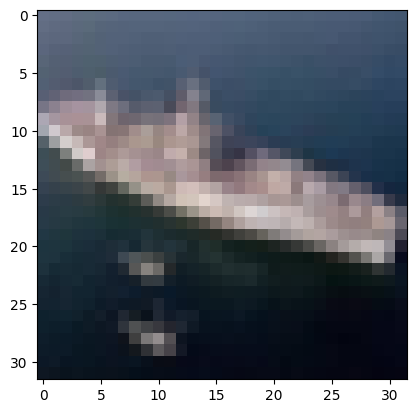

(32, 32, 3)


In [ ]:
plt.imshow(X_test[789])
plt.show()

print(X_test[789].shape)

## Preprocessing
With this knowledge we can adjust our dataset for further use.
We need three datasets. train,validate and test. We can separate 10000 images from the train dataset and use it as the validation dataset

In [ ]:
X_val = X_train[40000:]
y_val = y_train[40000:]

X_train = X_train[:40000]
y_train = y_train[:40000]

 Let's check the number of samples in each dataset to see the final results

In [ ]:
print(f"X_train:{len(X_train)}")
print(f"X_val:{len(X_val)}")
print(f"X_test:{len(X_test)}")

X_train:40000
X_val:10000
X_test:10000


## Normalization
Since pixel values are between 0 and 255, dividing these values by 255 will scale each of them to values between 0 and 1

In [ ]:
# Divide each dataset by 255
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

## Constructing the neural network
That was it for the preprocessing of the data

Now we can create our model. First thing first, we start by creating a model object using Sequential API of Keras

Use tf.keras.Sequential() to create a model object

In [ ]:
model = tf.keras.Sequential()

## Feature Extraction layers
For the first two layers, we add a convolution adn max pooling layer
Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

Use .add() method of the object to add the layer.

In [ ]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation='relu',
                                 input_shape =(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

Then we add more layers. One convolution, one max pooling, and one convolution layer again.

Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D to create the layers.

Use .add() method of the object to add the layer.


In [ ]:
model.add(tf.keras.layers.Conv2D(256,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
# model.add(tf.keras.layers.Conv2D(64,
#                                  kernel_size=(3,3),
#                                  strides=(1,1),
#                                  padding='same',
#                                  activation='relu'))

## Flatten
To connect the 2D convolution and 1D dense layers we have to "flatten" the convolution layer.

Use tf.keras.layers.Flatten() to flatten the layers

Use .add() method of the object to add the layer.

In [ ]:
## Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

## Classification layers
Now that we have the features extracted, we can move on to the classification part. We add two dense layers each with 64 nodes, 0.5 dropout and ReLU activation functions.

use tf.keras.layers.Dense() to create the layers
use .add() method of the object to add the layer

In [ ]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))

## Output layer
As the last part of out neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 10 in our case. We'll use the softmax activation function in the output layer.

Use tf.keras.layers.Dense() to create the layer.

Use .add() method of the object to add the layer

In [ ]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

## Optimizer
Now we have the structure of our model. To configure the model for training we will use the .compile() method. Inside the compile method we have to define the following:


*   "Adam" for optimizer
*   "Sparse Categorical CrossEntropy" for the loss function

Construct the model with the .compile() method



In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model
It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the the validation_data parameter we'll give the X_val and y_val as a tuple.

Use .fit() method of the model object for the training.

In [ ]:
# Train the model for 50 epochs
results = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size = 128,
                    validation_data=(X_val,y_val))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.2394 - loss: 2.0470 - val_accuracy: 0.4984 - val_loss: 1.4528
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.4240 - loss: 1.5833 - val_accuracy: 0.5602 - val_loss: 1.2910
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4831 - loss: 1.4154 - val_accuracy: 0.6032 - val_loss: 1.1642
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5191 - loss: 1.3137 - val_accuracy: 0.6217 - val_loss: 1.0795
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5464 - loss: 1.2378 - val_accuracy: 0.6409 - val_loss: 1.0384
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5614 - loss: 1.2018 - val_accuracy: 0.6591 - val_loss: 0.9862
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5760 - loss: 1.1511 - val_accuracy: 0.6611 - val_loss: 0.9715
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6006 - loss: 1.0936 - va

## Visualize the results
After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:

results.history['loss']
results.history['val_loss']

Use plt.show() to display the graph

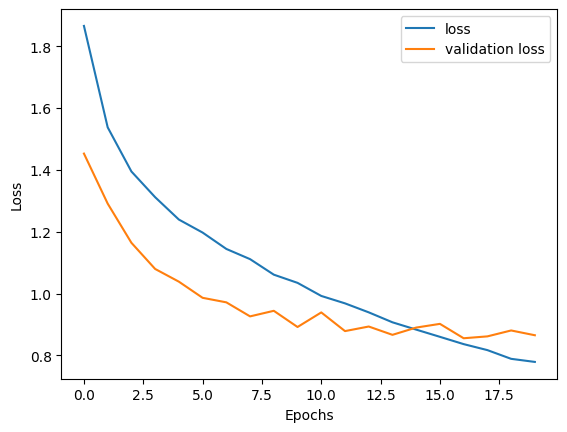

In [ ]:
 #  Plot the training loss
plt.plot(results.history['loss'],label='loss')
 # Plot the validation loss
plt.plot(results.history['val_loss'],label='validation loss')

# Name the x and y axises
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Put legend table
plt.legend()
# Show the plot
plt.show()

Now do the same thing for accuracy

Accuracy scores can be found in:

results.history['accuracy']

results.history['val_accuracy']

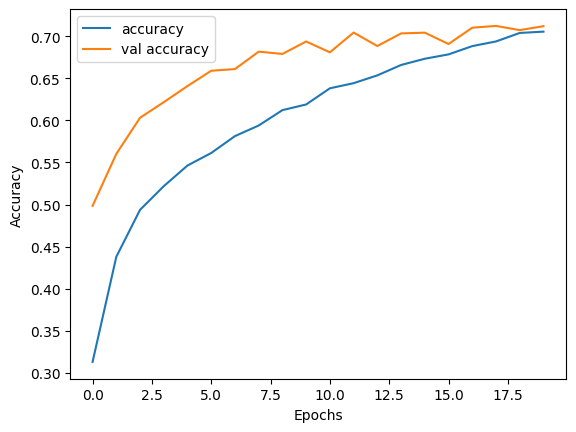

In [ ]:
# Plot the training accuracy
plt.plot(results.history['accuracy'],label='accuracy')
# plot the validation accuracy
plt.plot(results.history['val_accuracy'],label='val accuracy')
# name the x and y axises
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Put legend table
plt.legend()

# show the plot
plt.show()

# Performance evalutaion
Let's use the test dataset we created to evaluate the performance of the model

Use test_ont_batch method with test dataset as parameter

In [ ]:
#Evaluate the performance
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7071 - loss: 0.8778


[0.8745245337486267, 0.7080000042915344]

## Try a prediction
Next, we take the sample we selected at the begining and make a prediction on it.

Reshape the image to (1,32,32,3)

Use the .prediction() method of the model object

In [ ]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[789].reshape(1,32,32,3))
# Print the prediction result
prediction_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


array([[1.0548650e-02, 8.9682420e-05, 9.3974495e-06, 1.7740690e-07,
        2.0325269e-06, 2.9232081e-09, 2.3937901e-08, 1.4604915e-09,
        9.8934269e-01, 7.3448355e-06]], dtype=float32)

Finally we find the predicted class and prediction probability and print the results.

Use .argmax() to find the class

Use .max() to find the probability

In [ ]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the predicted probability
predicted_probability = prediction_result.max()
# print the results
print(f"Predicted class:{predicted_class}, Prediction Probability: %{predicted_probability}")

Predicted class:8, Prediction Probability: %0.9893426895141602
